> # **Import Libraries**

Import the module that we want to use for this research.

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings

> ### **Setup**

Setup the libraries.

In [2]:
warnings.simplefilter('ignore')

%matplotlib inline
%reload_ext autoreload
%autoreload 2

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)

plt.style.use('fivethirtyeight')

pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

> **note : sorry if my English typing is bad, hopefully you guys can understand.**

> # **Load Dataset**

This dataset is made by me after collecting some information about the price of pizza and many more on internet, and hopefully this dataset useful for you guys, sorry if i had a mistake in spelling some words, thanks in advance.

In [3]:
pizza_data = pd.read_csv('../input/pizza-price-prediction/pizza_v2.csv') # Load dataset

> # **Data Preprocessing**

We must check the data every time we want to make a model, because this is the important thing, if you suddenly meet a bad dataset, wether you want it or not, you must clean the dataset. since we use my dataset, i guarantee the data is 100% clean and have a non null data, and we can just focus in encoding the data since our data is categorical.

In [4]:
pizza_data # Checking the overall data

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [5]:
pizza_data.info() # Getting the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [6]:
pizza_data.dtypes.to_frame() # Checking the type

,0
company,object
price_rupiah,object
diameter,object
topping,object
variant,object
size,object
extra_sauce,object
extra_cheese,object
extra_mushrooms,object


In [7]:
pizza_data['price_rupiah'] = pizza_data['price_rupiah'].str.replace('Rp', '').str.replace(',', '').astype('float64') # Removing Rp 
pizza_data['diameter'] = pizza_data['diameter'].str.replace('inch', '').str.replace(',', '').astype('float64') # Removing Inch

pizza_data.loc[:, ['price_rupiah', 'diameter']] # Checking

,price_rupiah,diameter
0,235000.0,22.0
1,198000.0,20.0
2,120000.0,16.0
3,155000.0,14.0
4,248000.0,18.0
...,...,...
124,39000.0,8.5
125,72000.0,12.0
126,99000.0,14.0
127,44000.0,8.5


In [8]:
pizza_data.dtypes.to_frame() # Checking

,0
company,object
price_rupiah,float64
diameter,float64
topping,object
variant,object
size,object
extra_sauce,object
extra_cheese,object
extra_mushrooms,object


In [9]:
pizza_data.T # Checking the structure of our data

,0,1,2,3,4,5,6,7,8,9,10,11,...,117,118,119,120,121,122,123,124,125,126,127,128
company,A,A,A,A,A,A,A,A,A,A,A,A,...,E,E,E,E,E,E,E,E,E,E,E,E
price_rupiah,235000.0,198000.0,120000.0,155000.0,248000.0,140000.0,110000.0,70000.0,90000.0,90000.0,140000.0,110000.0,...,126500.0,75000.0,46000.0,72000.0,49000.0,83000.0,96000.0,39000.0,72000.0,99000.0,44000.0,78000.0
diameter,22.0,20.0,16.0,14.0,18.0,18.5,16.0,8.0,12.0,12.0,18.5,16.0,...,12.0,8.5,12.0,14.0,12.0,17.0,12.0,8.5,12.0,14.0,8.5,12.0
topping,chicken,papperoni,mushrooms,smoked_beef,mozzarella,black_papper,smoked_beef,papperoni,mushrooms,smoked_beef,mozzarella,black_papper,...,smoked_beef,smoked_beef,mushrooms,mozzarella,smoked_beef,chicken,mushrooms,tuna,tuna,tuna,meat,meat
variant,double_signature,double_signature,double_signature,double_signature,double_signature,american_favorite,american_favorite,american_favorite,american_favorite,american_favorite,super_supreme,super_supreme,...,double_decker,classic,classic,classic,crunchy,new_york,double_decker,spicy tuna,spicy tuna,spicy tuna,BBQ_meat_fiesta,BBQ_meat_fiesta
size,jumbo,jumbo,reguler,reguler,jumbo,jumbo,jumbo,reguler,reguler,reguler,jumbo,jumbo,...,medium,small,medium,large,medium,XL,medium,small,medium,large,small,medium
extra_sauce,yes,yes,yes,yes,yes,no,no,no,yes,no,no,yes,...,yes,yes,yes,yes,no,no,no,yes,yes,yes,yes,no
extra_cheese,yes,yes,yes,no,no,no,yes,no,no,no,no,yes,...,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,no
extra_mushrooms,no,no,yes,yes,yes,yes,yes,yes,yes,no,no,no,...,no,no,no,no,no,no,yes,yes,yes,yes,yes,yes


> # **Data Visualization**

Data visualization is an interdisciplinary field that deals with the graphic representation of data. It is a particularly efficient way of communicating when the data is numerous as for example a time series.

> ### **1. Extra Sauce Boxplot Visualization**

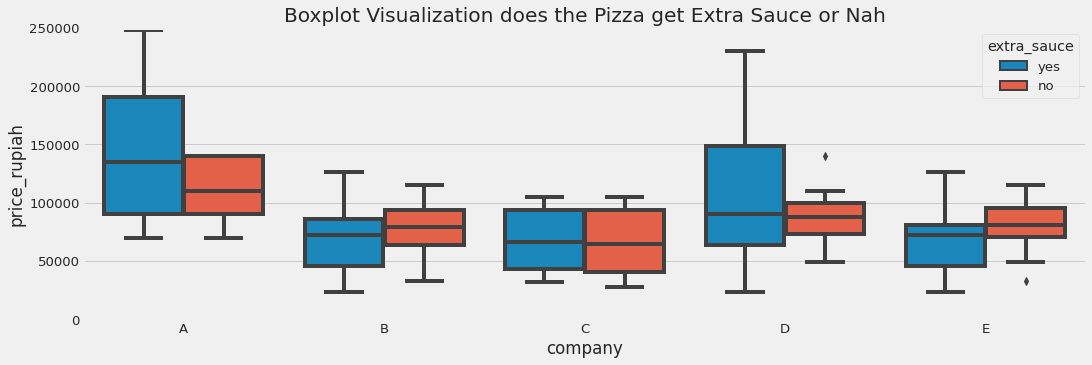

In [10]:
plt.figure(figsize=(16, 5))
sns.boxplot(x='company', 
                y='price_rupiah', 
                data=pizza_data, 
                hue='extra_sauce')
plt.title('Boxplot Visualization does the Pizza get Extra Sauce or Nah')
plt.ylim(0, 250000)
plt.show()

> ### **2. Extra Cheese Boxplot Visualization**

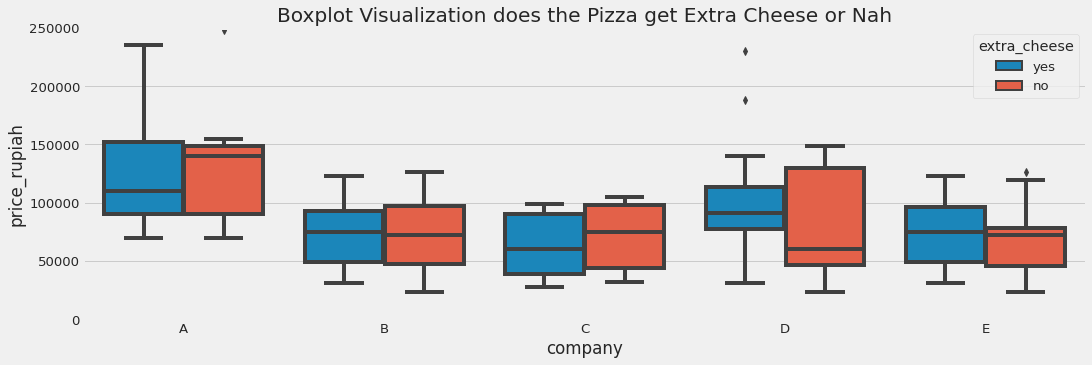

In [11]:
plt.figure(figsize=(16, 5))
sns.boxplot(x='company', 
                y='price_rupiah', 
                data=pizza_data, 
                hue='extra_cheese')
plt.title('Boxplot Visualization does the Pizza get Extra Cheese or Nah')
plt.ylim(0, 250000)
plt.show()

> ### **3. Extra Mushrooms Boxplot Visualization**

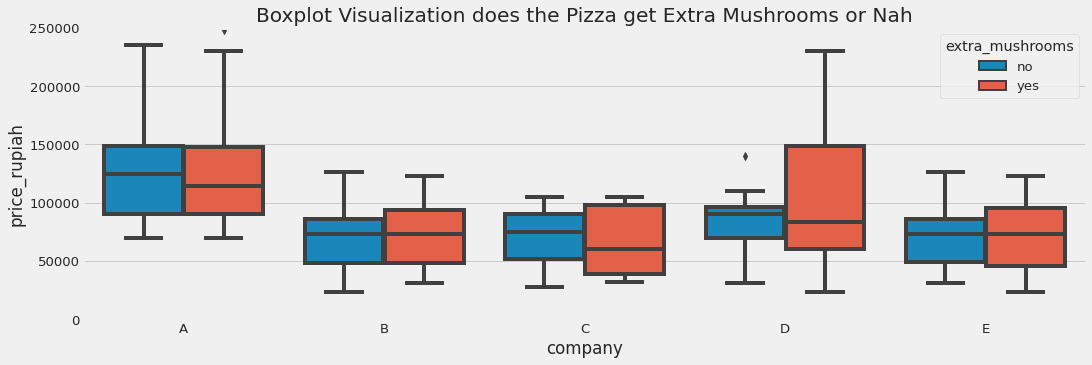

In [12]:
plt.figure(figsize=(16, 5))
sns.boxplot(x='company', 
                y='price_rupiah', 
                data=pizza_data, 
                hue='extra_mushrooms')
plt.title('Boxplot Visualization does the Pizza get Extra Mushrooms or Nah')
plt.ylim(0, 250000)
plt.show()

> ### **4. Pizza Variant Boxplot Visualization**

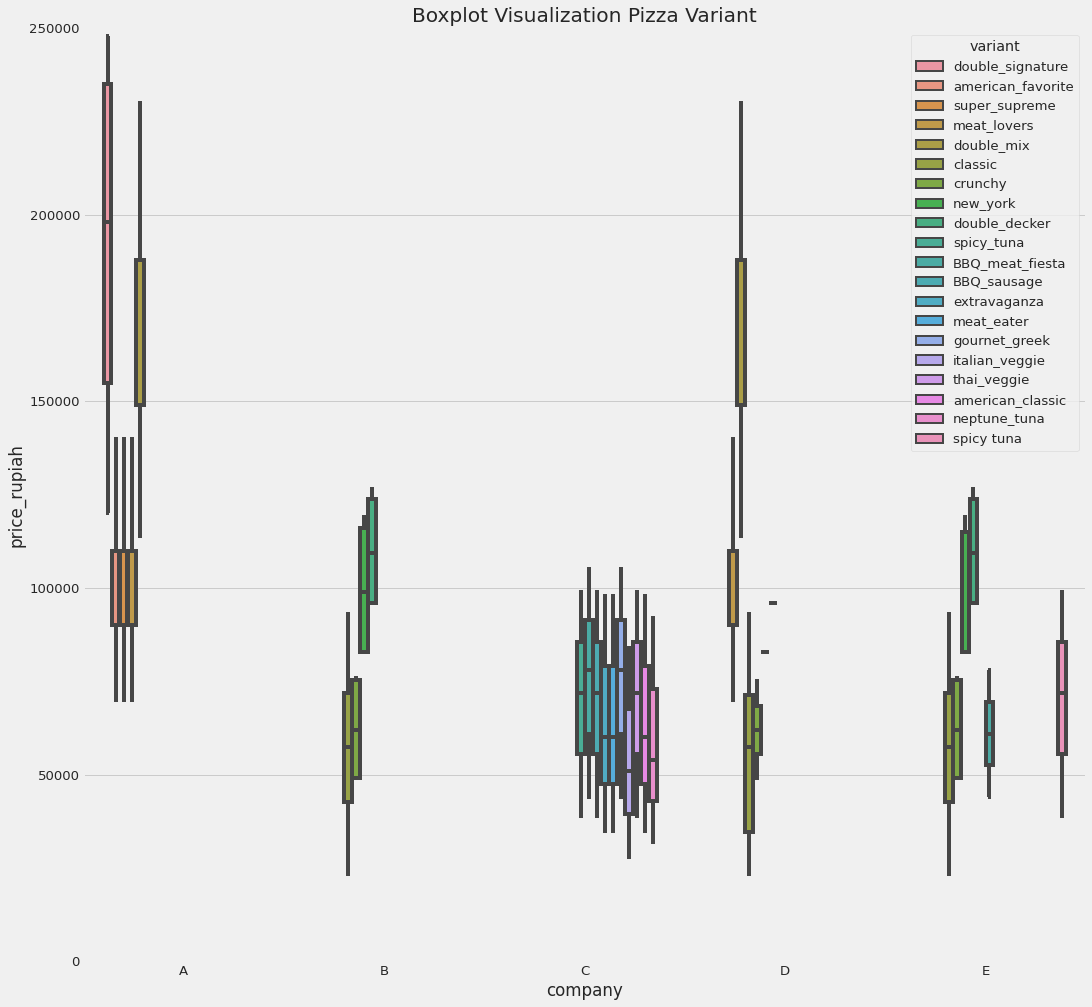

In [13]:
plt.figure(figsize=(16, 16))
sns.boxplot(x='company', 
                y='price_rupiah', 
                data=pizza_data, 
                hue='variant')
plt.title('Boxplot Visualization Pizza Variant')
plt.ylim(0, 250000)
plt.show()

> ### **5. Pizza Topping Boxplot Visualization**

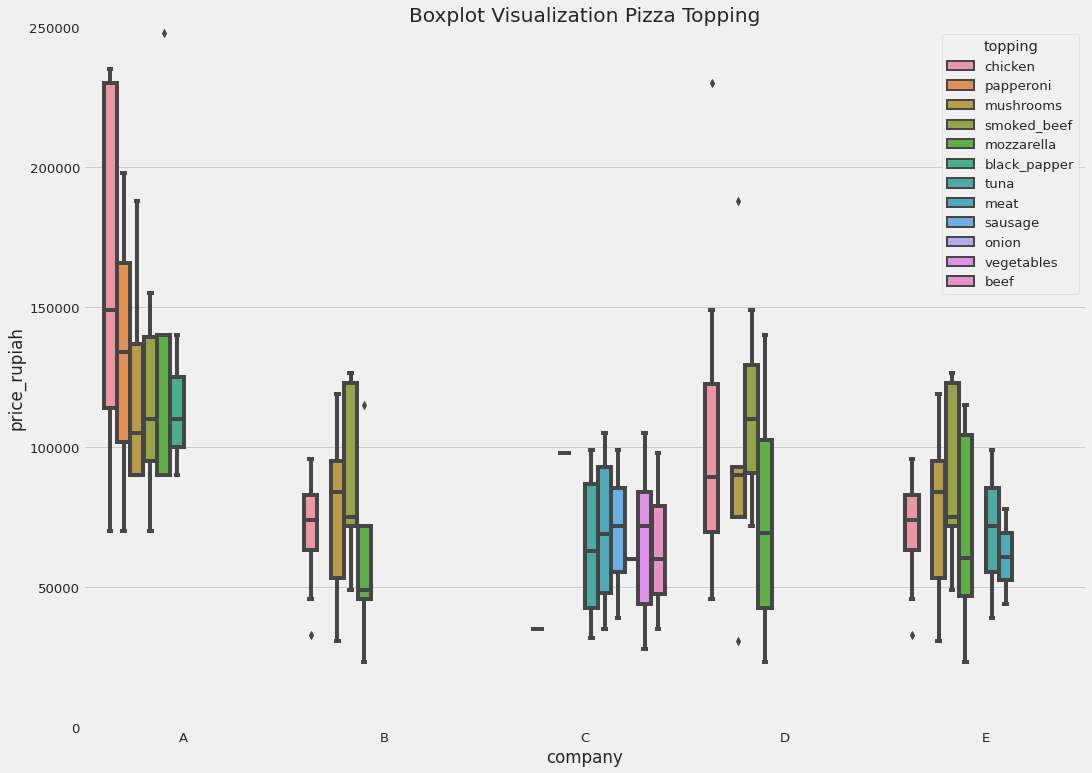

In [14]:
plt.figure(figsize=(16, 12))
sns.boxplot(x='company', 
                y='price_rupiah', 
                data=pizza_data, 
                hue='topping')
plt.title('Boxplot Visualization Pizza Topping')
plt.ylim(0, 250000)
plt.show()

> ### **6. Pizza Size Boxplot Visualization**

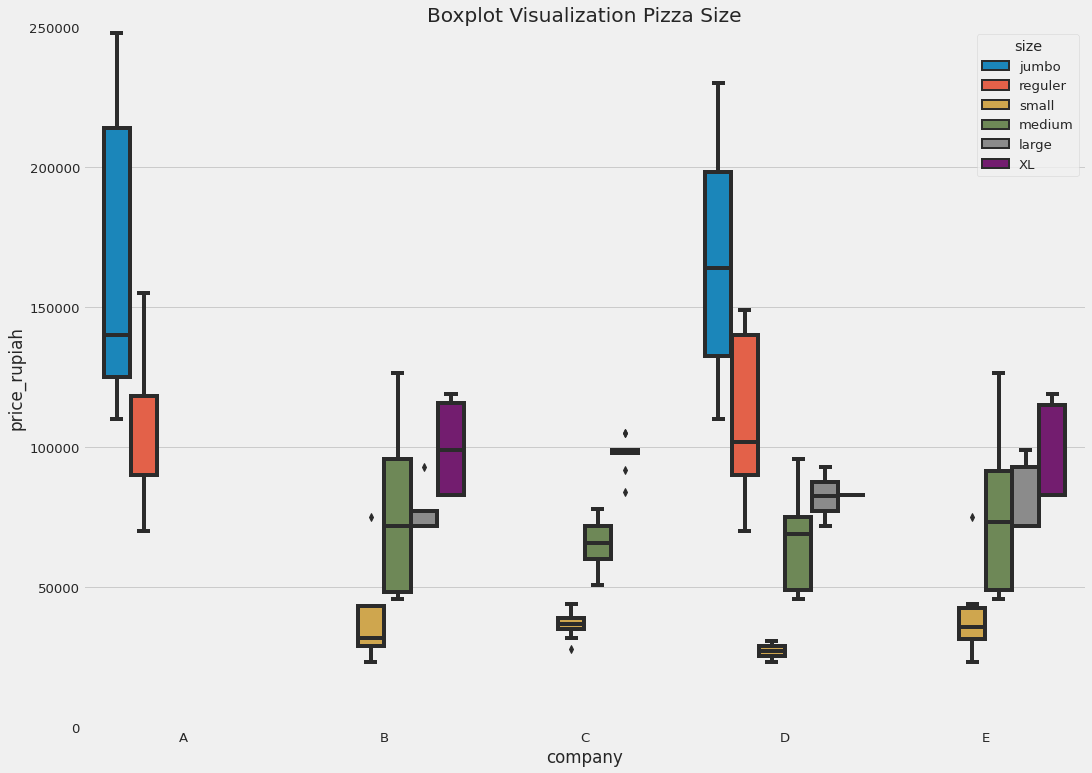

In [15]:
plt.figure(figsize=(16, 12))
sns.boxplot(x='company', 
                y='price_rupiah', 
                data=pizza_data, 
                hue='size')
plt.title('Boxplot Visualization Pizza Size')
plt.ylim(0, 250000)
plt.show()

> ###  **Conclusion :**

Okay, as we can see in the visualization above, there are some outlier.

> ### **1. Company with their Price Visualization**

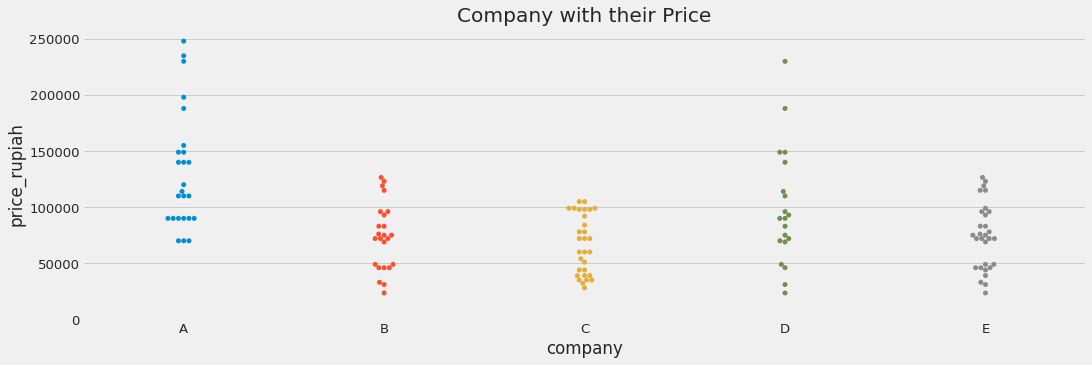

In [16]:
plt.figure(figsize=(16, 5))
sns.swarmplot(x='company', 
                    y='price_rupiah', 
                    data=pizza_data)
plt.title('Company with their Price')
plt.ylim(0, 260000)
plt.show()

### **2. Company with their Diameter Visualization**

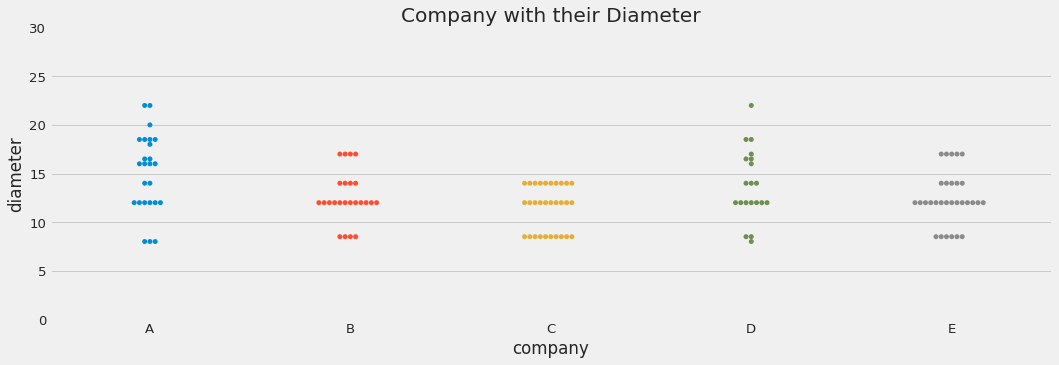

In [17]:
plt.figure(figsize=(16, 5))
sns.swarmplot(x='company', 
                    y='diameter', 
                    data=pizza_data)
plt.title('Company with their Diameter')
plt.ylim(0, 30)
plt.show()

> ### **3. Every Company with Price and Diameter Visualization**

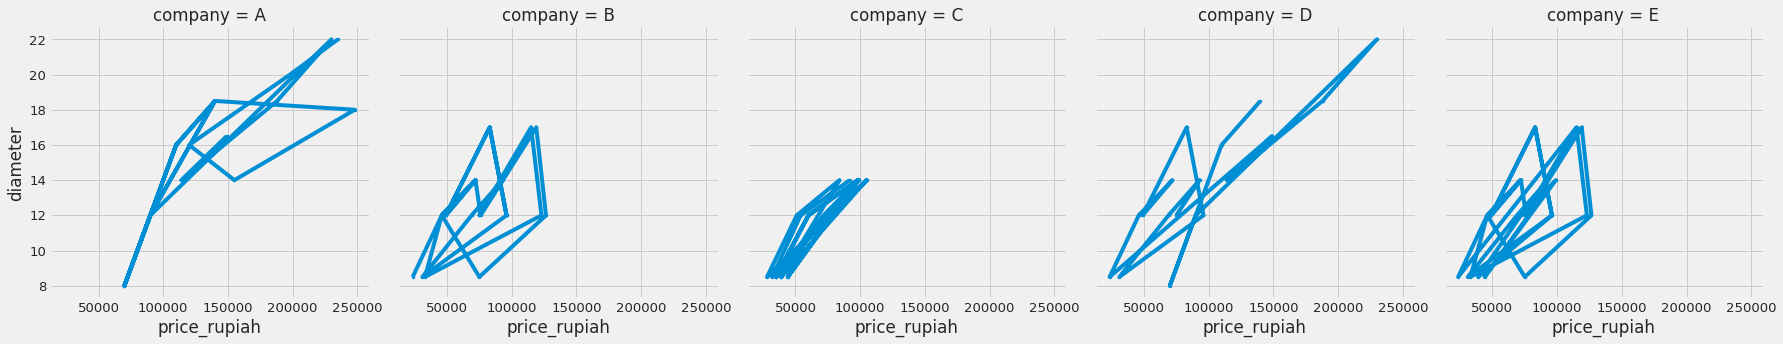

In [18]:
pizza_fg = sns.FacetGrid(pizza_data, col='company', col_wrap=5, height=5)
pizza_fg.map(plt.plot, 'price_rupiah', 'diameter', marker='.')
plt.show()

> ### **Do you understand what the data looks like with the visualization that I applied above?**

if not, feel free to visualize by yourself.

> # **Encoding**

we need to encode the data since this data is a categorical data, and i'm using LabelEncoder here, since this data have a lot of categorical data.

In [19]:
from sklearn.preprocessing import LabelEncoder # Import the Encoder

encoder = LabelEncoder() # Let's gooo!

In [20]:
for i in pizza_data.columns: # Make a for loops
    if pizza_data[i].dtype == 'object': 
        encoder.fit_transform(list(pizza_data[i].values)) # Fit transform
        pizza_data[i] = encoder.transform(pizza_data[i].values) # Transform
         
        for j in pizza_data.columns: # Make a for loops again
            if pizza_data[j].dtype == 'int':
                pizza_data[j] = pizza_data[j].astype('float64') # Change the type

In [21]:
pizza_data.head() # Checking the first 5 rows of data

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0.0,235000.0,22.0,2.0,8.0,1.0,1.0,1.0,0.0
1,0.0,198000.0,20.0,7.0,8.0,1.0,1.0,1.0,0.0
2,0.0,120000.0,16.0,5.0,8.0,4.0,1.0,1.0,1.0
3,0.0,155000.0,14.0,9.0,8.0,4.0,1.0,0.0,1.0
4,0.0,248000.0,18.0,4.0,8.0,1.0,1.0,0.0,1.0


> # **Splitting, Modeling, Model Evaluation**

In [22]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

> ### **Split Data**

Divide the data and split it using train test split module from sklearn.

In [23]:
X = pizza_data.drop(columns=['price_rupiah']) # Data X
y = pizza_data['price_rupiah'] # Data y

In [24]:
trainX, testX, trainY, testY = train_test_split(X, y,
                                                              test_size=0.3,
                                                              random_state=42) # Split it into train and test data

> ### **Modeling**

Since the data is for predicting numeric or price, from that, we can know, this data is a regression model, then i'm using **XGBRegressor** for that. and
**Pipelines** are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

In [25]:
pipe = Pipeline([ # Our Pipeline
    ('scaler', StandardScaler()),
    ('transformer', QuantileTransformer()),
    ('model', XGBRegressor(learning_rate=0.09,
                                       n_estimators=1200,
                                       objective='reg:squarederror',
                                       booster='gbtree'))
])

pipe.fit(trainX, trainY) # Train Data

Pipeline(steps=[('scaler', StandardScaler()),
                ('transformer', QuantileTransformer()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.09,
                              max_delta_step=0, max_depth=6, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=1200, n_jobs=4, num_parallel_tree=1,
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

> ### **Model Evaluation**

In [26]:
from sklearn import metrics
import math

In [27]:
pred_train = pipe.predict(trainX) # Predict Train Data
pred_test = pipe.predict(testX) # Predict Test Data

> ### **Evaluate Train Data**

In [28]:
train_r2_score = metrics.r2_score(trainY, pred_train) # R2_score
print(f'Train R2_score: {train_r2_score}')

train_mse = metrics.mean_squared_error(trainY, pred_train) # MSE Score
print(f'Train MSE : {train_mse}')

train_RMSE = math.sqrt(metrics.mean_squared_error(trainY, pred_train)) # SQRT MSE Score
print(f'Train RMSE : {train_RMSE}')

Train R2_score: 0.9999999999938672
Train MSE : 0.009303834703233507
Train RMSE : 0.09645638757093024


> ### **Visualization for Actual and Predicted Price in Training Data**

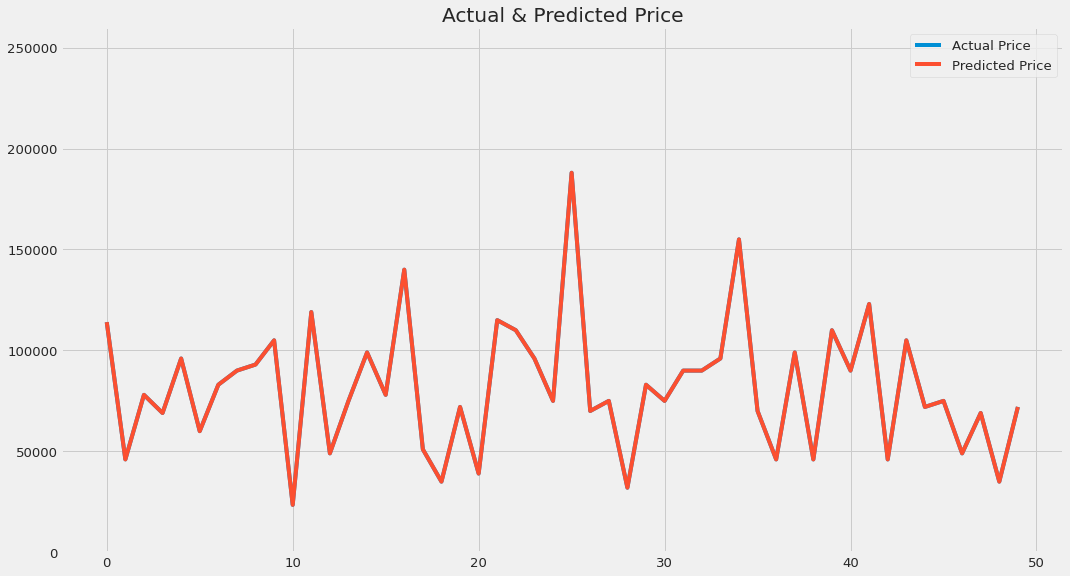

In [29]:
test = pd.DataFrame({'Predicted Price':pred_train, 'Actual Price':trainY})
fig= plt.figure(figsize=(16, 9))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.ylim(0, 260000)
plt.legend(['Actual Price','Predicted Price'])
plt.title('Actual & Predicted Price')
plt.show()

> ### **Evaluate Test Data**

In [30]:
test_r2_score = metrics.r2_score(testY, pred_test) # R2_score
print(f'Test R2_score: {test_r2_score}')

test_mse = metrics.mean_squared_error(testY, pred_test) # MSE Score
print(f'Test MSE : {test_mse}')

test_RMSE = math.sqrt(metrics.mean_squared_error(testY, pred_test)) # SQRT MSE Score
print(f'Test RMSE : {test_RMSE}')

Test R2_score: 0.9595749445968098
Test MSE : 123546916.11791229
Test RMSE : 11115.166040951088


> ### **Visualization for Actual and Predicted Price in Testing Data**

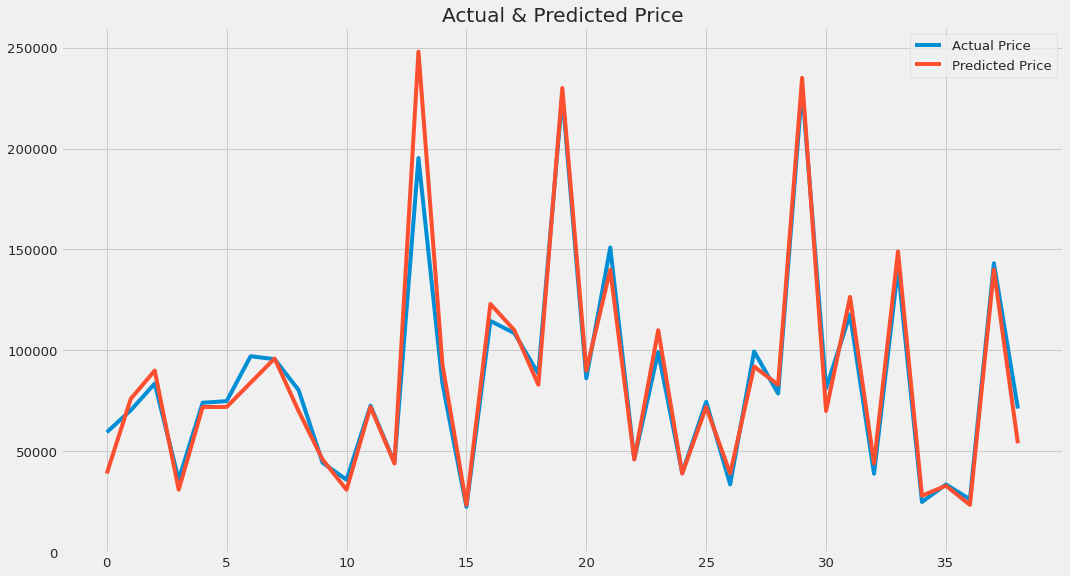

In [31]:
test = pd.DataFrame({'Predicted Price':pred_test, 'Actual Price':testY})
fig= plt.figure(figsize=(16, 9))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.ylim(0, 260000)
plt.legend(['Actual Price','Predicted Price'])
plt.title('Actual & Predicted Price')
plt.show()

> # **Prediction**

Output actual data with prediction data into csv file.

In [32]:
train_output = pd.DataFrame({
    'Train Actual Price': trainY,
    'Train Predicted Price ': pred_train})

train_output.to_csv('Train Prediction.csv', index=False)

> ## **Train Output Prediction**

In [33]:
train_prediction_output = pd.read_csv('./Train Prediction.csv')
train_prediction_output.head(10)

,Train Actual Price,Train Predicted Price
0,114000.0,113999.950
1,46000.0,45999.953
2,78000.0,77999.836
3,69000.0,69000.050
4,96000.0,96000.100
5,60000.0,60000.113
6,83000.0,82999.950
7,90000.0,90000.016
8,93000.0,93000.010
9,105000.0,105000.100


In [34]:
test_output = pd.DataFrame({
    'Test Actual Price': testY,
    'Test Predicted Price ': pred_test})

test_output.to_csv('Test Prediction.csv', index=False)

> ## **Test Output Prediction**

In [35]:
test_prediction_output = pd.read_csv('./Test Prediction.csv')
test_prediction_output.head(10)

,Test Actual Price,Test Predicted Price
0,39000.0,59461.305
1,76000.0,70346.030
2,90000.0,83570.625
3,31000.0,35981.880
4,72000.0,74069.930
5,72000.0,74887.490
6,84000.0,97120.070
7,96000.0,95671.586
8,70000.0,80380.110
9,46000.0,44418.133


> # **That's it! don't forget to give me feedback and upvote if you like it! thanks in advance!**

## **Here's my another notebook that i made:**

**Data Analysist and Visualization:**

- [World Covid Vaccination](https://www.kaggle.com/knightbearr/data-visualization-world-vaccination-knightbearr)
- [Netflix Time Series Visualization](https://www.kaggle.com/knightbearr/netflix-visualization-time-series-knightbearr)
- [Taiwan Weight Stock Analysist](https://www.kaggle.com/knightbearr/taiwan-weight-stock-index-analysis-knightbearr)

**Regression and Classification:**

- [S&P 500 Companies](https://www.kaggle.com/knightbearr/pricesales-eda-rfr-knightbearr)
- [Credit Card Fraud Detection](https://www.kaggle.com/knightbearr/credit-card-fraud-detection-knightbearr)
- [Car Price V3](https://www.kaggle.com/knightbearr/car-price-v3-xgbregressor-knightbearr)
- [House Price Iran](https://www.kaggle.com/knightbearr/house-price-iran-knightbearr)

**Deep Learning:**

- [Rock Paper Scissors](https://www.kaggle.com/knightbearr/rock-paper-scissors-knightbearr)

**Some Python Code:**

- [Python Cheat Sheet](https://www.kaggle.com/knightbearr/python-cheat-sheet-knightbearr)
- [22 Python Progam](https://www.kaggle.com/knightbearr/22-simple-python-program-knightbearr)